# **Predictive Analysis of BNK48 & CGM48's 16th Single General Election**

![GE4 General Election Banner](GE4banner.jpeg)

*Image Source: [BNK48 Official YouTube Video](https://www.youtube.com/watch?v=4EGrHyXIvf0)*

<a id='top'></a>

# Table of Contents
1. [Introduction to the 48 Group](#1)
2. [Understanding the General Election](#2)
3. [Data Collection Methodology](#3)
4. [Dataset Overview](#4)
5. [Exploratory Data Analysis](#5)
  - 5.1 [Data Preprocessing](#5.1)
6. [Predictive Model Building](#6)
  - 6.1 [`GE4_Rank` Regression Model](#6-1)
    - 6.1.1 [Random Forest Regressor](#6-1-1)
  - 6.2 [`GE4_Position` Classification Model](#6-2)
    - 6.2.1 [Random Forest Classifier](#6-2-1)
    - 6.2.2 [XGB Classifier](#6-2-2)
    - 6.2.3 [LightGBM Classifier](#6-2-3)
    - 6.2.4 [Emsemble](#6-2-4)
  - 6.3 [Hyperparameter Tuning (Optuna)](#6-3)
7. [Feature Importance Analysis](#7)
8. [Conclusion and Insights](#8)

<a id='1'></a>

## 1. Introduction to the 48 Group

Welcome to the predictive analysis project for the 16th Single General Election of BNK48 and CGM48, the Thai sister groups of the international 48 Group. These idol groups have revolutionized pop culture in Asia, capturing the hearts of fans through music, performances, and interactive fan events.

The 48 Group, which originated in Japan with AKB48, is known for its unique concept of "idols you can meet." The groups have localized sister groups in several countries, each with its own teams of performers. BNK48 and CGM48 are based in Thailand and have garnered a significant following through their engaging performances and public appearances.

<a id='2'></a>

## 2. Understanding the General Election

### General Election

The General Election is a hallmark event for 48 Group fans, where supporters vote for their favorite members. The outcome of this event is crucial as it determines the lineup for the next single and often influences the group's direction. Like the 3rd election, BNK48 and CGM48 utilized a blockchain-based token voting system within the iAM48 application for this 4th election, showcasing a blend of pop culture and cutting-edge technology. Preliminary results are announced to the fans at two separate events before the final results, adding to the excitement and speculation about the final rankings.

### Key Terms

- **Senbatsu**: The selected members who will perform the A-side of a single.
- **Coupling Song**: Additional tracks featured on a single, often performed by non-Senbatsu members.
- **Oshi**: A fan's favorite member, akin to a "most supported" idol.
- **Kami**: Derived from "Kamisama" meaning "God," referring to top-ranked idols.
- **Team**: Subgroups within BNK48 and CGM48, each with distinct identities and songs.
- **Center**: The lead position in a group's formation, often front and center during performances.

### Rank
- **Kami7**: The elite top seven idols as determined by fan votes in the general election. These members are considered the most popular and influential within the group.
- **Senbatsu**: The top 16 members selected to perform on the main track of a single, often considered the face of the group during promotions.
- **Under Girls**: Members who rank 17th to 32nd in the general election. They typically perform on the B-side of a single and are featured in secondary promotions.
- **Next Girls**: Ranks 33 to 48 from the election, these members are featured in additional songs and are recognized for their potential and growing popularity.

<a id='3'></a>

## 3. Data Collection Methodology

### Data Sources
The data for the analysis of the 3rd and 4th General Elections of BNK48 & CGM48 was meticulously gathered from a combination of online sources on 17 December 2023. The primary sources of data were:

- **Twitter Account [@Stats48TH](https://twitter.com/Stats48TH)**: An unofficial but valuable source providing comprehensive statistics and information on the members of BNK48 and CGM48.
- **Wikipedia Pages**: Detailed historical data and election results were extracted from Wikipedia for the:
  - [3rd General Election for the 12th Single](https://th.wikipedia.org/wiki/การเลือกตั้งทั่วไปเซ็มบัตสึบีเอ็นเคโฟร์ตีเอต_ประจำซิงเกิลที่_12)
  - [4th General Election for the 16th Single](https://th.wikipedia.org/wiki/การเลือกตั้งทั่วไปเซ็มบัตสึบีเอ็นเคโฟร์ตีเอต_ประจำซิงเกิลที่_16)
  
### Data Extraction
The data extraction process encompassed multiple steps to ensure the richness and accuracy of the dataset:

- **Reviewing Twitter Data**: An in-depth analysis of data summaries from the Twitter account was conducted to understand the nuances of the election results and member statistics.
- **Wikipedia Research**: The Wikipedia pages for the 3rd and 4th General Elections were scrutinized to validate and enrich the data obtained from Twitter.
- **Database Analysis**: The `Database members BNK48 & CGM48 (10_12_2023 21.45).xlsx`, provided by @Stats48TH, offered a granular view of the election outcomes and member profiles.
- **Power Query (Get Data)**: Power Query in Microsoft Excel was leveraged to perform data extraction, shaping, and transformation, facilitating the integration of various data sources.

### Data Processing and Model Creation
A comprehensive data processing workflow was adopted to refine the raw data and construct a robust data model:

- **OCR (Optical Character Recognition)**: OCR technology was utilized to digitize images and scanned documents, rendering them into an analyzable format.
- **Data Scraping**: Structured data was scraped from the web, transforming unstructured online information into a usable dataset.
- **Data Cleaning**: The dataset was meticulously cleaned to rectify any inaccuracies and standardize the format, thus ensuring the integrity of the analysis.
- **Data Model Creation in PowerPivot**: The data from various sources was combined using PowerPivot in Excel, which facilitated the creation of a data model that underscores the relationships between different entities. The ER Diagram provided a visual representation of this data model, showcasing how the `GE4rank` table was used as the cornerstone for 'Left Joins' with other tables based on the `Name_Band` attribute.

![ER_Diagram](ER_diagram.png)

### Final Dataset
The culmination of the above processes led to the assembly of the final dataset, which offers a holistic portrayal of the election results and member data. This dataset underpins the exploratory data analysis and predictive modeling executed in this project, aiming to extract meaningful insights and patterns.


<a id='4'></a>

## 4. Dataset Overview

This dataset includes detailed statistics from the latest General Election, including votes counted via blockchain technology, member rankings, and various other metrics that could influence the election outcomes.

| Column Name            | Description                                                   | Data Type | Missing | Example Values |
|------------------------|---------------------------------------------------------------|-----------|---------|----------------|
| GE4_Rank               | Rank in the 4th General Election                              | Integer   | 0       | 1, 2, 3 to 64  |
| Name                   | Member's nickname                                             | String    | 0       |                |
| Name_Band              | Combined name and band identifier                             | String    | 0       |                |
| GE4_Token              | Tokens earned in the 4th General Election                     | Float     | 0       |                |
| GE4_Transaction        | Number of transactions in the 4th General Election            | Integer   | 0       |                |
| GE4_Wallet             | Wallet balance during the 4th General Election                | Integer   | 0       |                |
| GE4_Token/Transaction  | Average tokens per transaction in the 4rd GE                  | Float     | 0       |                |
| GE4_Prelim1            | Preliminary round 1 rank in the 4th General Election          | Integer   | 16      |                |
| GE4_Token_Prelim1      | Tokens earned in the preliminary round 1 of the 4th GE        | Float     | 16      |                |
| GE4_Prelim2            | Preliminary round 2 rank in the 4th General Election          | Integer   | 16      |                |
| Band                   | Band name (BNK48 or CGM48)                                    | String    | 0       | BNK48, CGM48   |
| Gen                    | Generation of the member                                      | Integer   | 0       | 1, 2, 3, 4     |
| Band_Gen               | Combined band and generation identifier                       | String    | 0       | BNK48_1, CGM48_2 |
| Full_Name_TH           | Member's full name in Thai                                    | String    | 0       |                |
| Team_Position          | Position within the team                                      | String    | 57      | Captain, Vice Captain, Shihainin |
| Team                   | Team affiliation within the band                              | String    | 0       | BIII, NV, C, Trainee |
| Age                    | Age of the member at the time of 4th General Election         | Integer   | 0       | 20, 21         |
| GE1_Rank               | Rank in the 1st General Election                              | Integer   | 59      |                |
| GE2_Rank               | Rank in the 2nd General Election                              | Integer   | 46      |                |
| GE3_Rank               | Rank in the 3rd General Election                              | Integer   | 22      |                |
| GE3_Position           | Position in the 3rd General Election                          | String    | 23      | Senbatsu, Under Girls, Next Girls, Unranked |
| GE3_Prelim1            | Preliminary round 1 rank in the 3rd General Election          | Integer   | 32      |                |
| GE3_Token_Prelim1      | Tokens earned in the preliminary round 1 of the 3rd GE        | Float     | 32      |                |
| GE3_Prelim2            | Preliminary round 2 rank in the 3rd General Election          | Integer   | 34      |                |
| GE3_Token              | Tokens earned in the 3rd General Election                     | Float     | 34      |                |
| GE3_Transactions       | Number of transactions in the 3rd General Election            | Integer   | 23      |                |
| GE3_Wallet             | Wallet balance during the 3rd General Election                | Integer   | 23      |                |
| GE3_Token/Transaction  | Average tokens per transaction in the 3rd GE                  | Float     | 23      |                |
| GE3_Center             | Whether the member was the center in the 3rd GE (1 for center)| Integer   | 0       | 0, 1           |
| Request_Hour           | Total number of times participation in the Request Hour Concert | Integer | 0       | 1, 2, 3        |
| Game_Caster            | Total number of times participation in the 48TH Game Caster   | Integer   | 0       | 1, 2, 3        |
| Theater_Stage          | Number of times performed on the theater stage                | Integer   | 0       |                |
| iAM48_Kami             | Number of 'Kami' (only supporter) in the iAM48 platform       | Integer   | 0       |                || Column 
| iAM48_Oshi             | Number of 'Oshi' (supporter) in the iAM48 platform               | Integer   | 0       |                     |
| iAM48_Cookies          | Number of cookies received in the iAM48 platform                 | Integer   | 0       |                     |
| iAM48_Likes            | Number of likes received in the iAM48 platform                   | Integer   | 0       |                     |
| Setbatsu_Total         | Total number of times being in the Senbatsu lineup before 4th GE | Integer   | 0       |                     |
| Center_Main_Total      | Total number of times being the main center before 4th GE        | Integer   | 0       |                     |
| GE4_Position           | Position in the 4th General Election                             | String    | 0       | Senbatsu, Under Girls, Next Girls, Unranked |


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('BNK48_CGM48_df.xlsx')

In [3]:
# Set the option to display all columns (None means no limit to the number of columns)
pd.set_option('display.max_columns', None)

In [4]:
df

,GE4_Rank,Name,Name_Band,GE4_Token,GE4_Transaction,GE4_Wallet,GE4_Token/Transaction,GE4_Prelim1,GE4_Token_Prelim1,GE4_Prelim2,Band,Gen,Band_Gen,Full_Name_TH,Team_Position,Team,Age,GE1_Rank,GE2_Rank,GE3_Rank,GE3_Position,GE3_Prelim1,GE3_Token_Prelim1,GE3_Prelim2,GE3_Token,GE3_Transactions,GE3_Wallet,GE3_Token/Transaction,GE3_Center,Request_Hour,Game_Caster,Theater_Stage,iAM48_Kami,iAM48_Oshi,iAM48_Cookies,iAM48_Likes,Setbatsu_Total,Center_Main_Total,GE4_Position
0,1,Pim,Pim_CGM48,133891.5231,1023,570,130.881254,4.0,5590.69,1.0,CGM48,1,CGM48_1,พรวารินทร์ วงศ์ตระกูลกิจ,NaN,C,17,NaN,22.0,5.0,Senbatsu,5.0,5838.43,5.0,59433.96,513.0,129.0,115.86,False,2,6,0,918,12670,17831388,94093,9,1,Senbatsu
1,2,Paeyah,Paeyah_BNK48,110223.6325,841,459,131.062583,5.0,4159.38,5.0,BNK48,3,BNK48_3,นิพพิชฌาน์ พิพิธเดชา,NaN,NV,18,NaN,NaN,24.0,Under Girls,26.0,1001.39,20.0,9752.89,1194.0,382.0,8.17,False,3,0,56,1657,16731,8486508,60637,4,1,Senbatsu
2,3,Kaning,Kaning_CGM48,99316.8750,967,526,102.706179,2.0,10419.31,2.0,CGM48,1,CGM48_1,วิทิตา สระศรีสม,NaN,C,19,NaN,40.0,6.0,Senbatsu,3.0,7309.99,6.0,53234.80,2369.0,929.0,22.47,False,3,27,0,3101,31554,27935669,183438,11,3,Senbatsu
3,4,Minmin,Minmin_BNK48,72812.5690,557,281,130.722745,3.0,6017.28,8.0,BNK48,2,BNK48_2,รชยา ทัพพ์คุณานนต์,NaN,BIII,26,19.0,14.0,10.0,Senbatsu,9.0,5102.41,8.0,36102.21,1166.0,393.0,30.06,False,5,2,148,1404,45844,26256835,182763,9,0,Senbatsu
4,5,Pancake,Pancake_BNK48,52589.7200,484,266,108.656446,28.0,1069.53,21.0,BNK48,3,BNK48_3,พิทยาภรณ์ เกียรติฐิตินันท์,NaN,NV,16,NaN,NaN,43.0,Next Girls,33.0,854.55,38.0,3667.27,737.0,235.0,4.98,False,3,5,43,714,13133,10090840,63289,3,1,Senbatsu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Berry,Berry_BNK48,920.9499,139,104,6.625539,NaN,NaN,NaN,BNK48,4,BNK48_4,จิรภิญญา จันทวรรณกูร,NaN,Trainee,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,83,2901,1945863,16496,0,0,Unranked
60,61,Wawa,Wawa_BNK48,669.7650,136,112,4.924743,NaN,NaN,NaN,BNK48,4,BNK48_4,พิมพ์นเรศ ลำใย,NaN,Trainee,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,126,2870,592968,25511,0,0,Unranked
61,62,Papang,Papang_CGM48,494.7850,215,158,2.301326,NaN,NaN,NaN,CGM48,2,CGM48_2,ศุภัชญา คำเงิน,NaN,Trainee,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,149,3385,1436223,10568,0,0,Unranked
62,63,Emma,Emma_CGM48,275.6710,182,147,1.514676,NaN,NaN,NaN,CGM48,2,CGM48_2,ศศิชา วงศ์วัฒนอนันต์,NaN,Trainee,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,62,2421,581191,11824,0,0,Unranked


In [5]:
#df.to_csv('BNK48_CGM48_df.csv', index=False)

<a id='5'></a>

## 5. Exploratory Data Analysis

In [6]:
import sweetviz as sv

# Analyzing the dataset
#report = sv.analyze(df)

# Generating the report
#report.show_notebook()

In [7]:
# Getting a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GE4_Rank               64 non-null     int64  
 1   Name                   64 non-null     object 
 2   Name_Band              64 non-null     object 
 3   GE4_Token              64 non-null     float64
 4   GE4_Transaction        64 non-null     int64  
 5   GE4_Wallet             64 non-null     int64  
 6   GE4_Token/Transaction  64 non-null     float64
 7   GE4_Prelim1            48 non-null     float64
 8   GE4_Token_Prelim1      48 non-null     float64
 9   GE4_Prelim2            48 non-null     float64
 10  Band                   64 non-null     object 
 11  Gen                    64 non-null     int64  
 12  Band_Gen               64 non-null     object 
 13  Full_Name_TH           64 non-null     object 
 14  Team_Position          7 non-null      object 
 15  Team    

In [8]:
# Descriptive statistics of the dataframe
df.describe()

,GE4_Rank,GE4_Token,GE4_Transaction,GE4_Wallet,GE4_Token/Transaction,GE4_Prelim1,GE4_Token_Prelim1,GE4_Prelim2,Gen,Age,GE1_Rank,GE2_Rank,GE3_Rank,GE3_Prelim1,GE3_Token_Prelim1,GE3_Prelim2,GE3_Token,GE3_Transactions,GE3_Wallet,GE3_Token/Transaction,Request_Hour,Game_Caster,Theater_Stage,iAM48_Kami,iAM48_Oshi,iAM48_Cookies,iAM48_Likes,Setbatsu_Total,Center_Main_Total
count,64.000000,64.000000,64.000000,64.000000,64.000000,48.00,48.000000,48.00,64.000000,64.000000,5.000000,18.000000,42.000000,32.000000,32.000000,30.000000,41.000000,41.000000,41.000000,41.000000,64.000000,64.000000,64.000000,64.000000,64.00000,6.400000e+01,64.000000,64.000000,64.000000
mean,32.500000,19369.981492,406.390625,236.296875,38.888322,24.50,2082.308958,24.50,2.250000,19.812500,18.400000,31.166667,35.928571,27.281250,1844.875937,27.466667,9637.234878,844.951220,268.146341,10.878537,2.093750,7.453125,32.421875,1002.046875,17805.96875,9.757608e+06,91762.609375,3.406250,0.250000
std,18.618987,25935.246469,246.527864,119.313736,33.622831,14.00,2273.912177,14.00,1.112697,3.318419,3.577709,11.617684,16.609420,13.006783,1870.861349,13.299555,12764.762065,465.911792,183.300377,17.662012,1.610666,7.700607,48.688125,1624.024429,17443.28327,7.494040e+06,74172.456294,3.499291,0.590937
min,1.000000,209.760000,127.000000,104.000000,1.514676,1.00,352.640000,1.00,1.000000,14.000000,13.000000,8.000000,5.000000,3.000000,360.160000,5.000000,298.710000,247.000000,39.000000,0.910000,0.000000,0.000000,0.000000,34.000000,1898.00000,5.090910e+05,7869.000000,0.000000,0.000000
25%,16.750000,5372.644250,247.250000,156.500000,18.039122,12.75,858.705000,12.75,1.000000,17.000000,17.000000,22.750000,22.250000,18.250000,622.935000,18.250000,3108.140000,474.000000,129.000000,5.210000,0.000000,0.000000,0.000000,213.750000,5641.50000,3.964677e+06,40691.750000,0.000000,0.000000
50%,32.500000,8443.286500,359.500000,208.000000,28.312180,24.50,1294.235000,24.50,2.000000,20.000000,19.000000,32.500000,37.500000,28.000000,961.020000,29.500000,5008.460000,711.000000,230.000000,7.110000,2.000000,5.500000,0.000000,515.500000,11151.00000,8.526086e+06,66718.000000,2.500000,0.000000
75%,48.250000,24685.510250,434.000000,266.000000,44.556560,36.25,2535.347500,36.25,3.000000,21.250000,21.000000,39.750000,48.750000,37.500000,2007.862500,37.750000,9877.980000,1130.000000,391.000000,10.820000,3.000000,13.000000,52.750000,1085.750000,24190.25000,1.336809e+07,131324.750000,5.250000,0.000000
max,64.000000,133891.523100,1149.000000,581.000000,131.062583,48.00,11375.590000,48.00,4.000000,28.000000,22.000000,48.000000,62.000000,48.000000,7309.990000,48.000000,59433.960000,2369.000000,929.000000,115.860000,6.000000,27.000000,174.000000,11315.000000,93145.00000,2.793567e+07,380536.000000,12.000000,3.000000


<a id='5-1'></a>

### 5.1 Data Preprocessing

#### Dropping Columns
- **Identifier Columns:** `Name`, `Name_Band`, `Full_Name_TH`
- **Redundant or Less Significant Columns:** `Gen`, `GE3_Position`, `GE3_Prelim1`, `GE3_Token_Prelim1`, `GE3_Prelim2`
- **Post-Outcome Variables:** Excluded `GE4_Token`, `GE4_Transaction`, `GE4_Wallet`, `GE4_Token/Transaction` because these features are only known after the rank is announced and their inclusion would lead to data leakage.

#### Feature Engineering
- **Band_Gen_Team:** To capture the hierarchical relationship (Band > Generation > Team), created a custom encoding by concatenating `Band`, `Gen`, and `Team`. Applied Label Encoding to this new column and then dropped the individual `Band`, `Gen`, `Team`, and `Band_Gen` columns.
- **GE1_Par & GE2_Par:** Converted `GE1_Rank` and `GE2_Rank` into binary participation columns (`GE1_Par`, `GE2_Par`) and dropped the original columns.
- **GE3_Center & Team_Position:** Converted to binary format.

#### Missing Data Imputation
- Imputed `GE3_Rank`, `GE4_Prelim1`, and `GE4_Prelim2` with max rank + 1 (max rank assumed to be 48).
- Imputed `GE4_Token_Prelim1`, `GE3_Token`, `GE3_Transactions`, `GE3_Wallet`, `GE3_Token/Transaction` with their respective minimum values.

#### Scaling
- Applied `StandardScaler` to the following columns:
  - `GE4_Token_Prelim1`
  - `Age`
  - `GE3_Token`, `GE3_Transactions`, `GE3_Wallet`, `GE3_Token/Transaction`
  - `Request_Hour`, `Game_Caster`, `Theater_Stage`
  - `iAM48_Kami`, `iAM48_Oshi`, `iAM48_Cookies`, `iAM48_Likes`
  - `Setbatsu_Total`, `Center_Main_Total`

#### Data Type Conversion
- Converted `GE4_Prelim1`, `GE4_Prelim2`, and `GE3_Rank` to integer type.

In [9]:
# Dropping identifier columns
df = df.drop(['Name', 'Name_Band', 'Full_Name_TH'], axis=1)

# Dropping columns where significance is included in other columns
df = df.drop(['GE3_Position', 'GE3_Prelim1', 'GE3_Token_Prelim1', 'GE3_Prelim2'], axis=1)

# Drop the post-outcome variables columns that should not be used for prediction to prevent data leakage
df = df.drop(['GE4_Token', 'GE4_Transaction', 'GE4_Wallet', 'GE4_Token/Transaction'], axis=1)

from sklearn.preprocessing import LabelEncoder

# Concatenating the original 'Band', 'Gen', and 'Team' columns
df['Band_Gen_Team'] = df['Band'] + "_" + df['Gen'].astype(str) + "_" + df['Team']

# Applying Label Encoding to the new 'Band_Gen_Team' column
label_encoder = LabelEncoder()
df['Band_Gen_Team_Encoded'] = label_encoder.fit_transform(df['Band_Gen_Team'])

# Optionally, dropping the original columns if they are no longer needed
df.drop(['Band', 'Gen', 'Team', 'Band_Gen_Team', 'Band_Gen'], axis=1, inplace=True)

# Converting GE1_Rank and GE2_Rank to binary participation columns
df['GE1_Par'] = df['GE1_Rank'].notna().astype(int)
df['GE2_Par'] = df['GE2_Rank'].notna().astype(int)
df = df.drop(['GE1_Rank', 'GE2_Rank'], axis=1)

# Imputing missing data for specific columns
max_rank = 48  # max rank is 48
df['GE3_Rank'].fillna(max_rank + 1, inplace=True)
df['GE4_Prelim1'].fillna(max_rank + 1, inplace=True)
df['GE4_Prelim2'].fillna(max_rank + 1, inplace=True)
df['GE4_Token_Prelim1'].fillna(df['GE4_Token_Prelim1'].min(), inplace=True)
df['GE3_Token'].fillna(df['GE3_Token'].min(), inplace=True)
df['GE3_Transactions'].fillna(df['GE3_Transactions'].min(), inplace=True)
df['GE3_Wallet'].fillna(df['GE3_Wallet'].min(), inplace=True)
df['GE3_Token/Transaction'].fillna(df['GE3_Token/Transaction'].min(), inplace=True)

# Converting GE3_Center and Team_Position to binary
df['GE3_Center'] = df['GE3_Center'].notna().astype(int)
df['Team_Position'] = df['Team_Position'].notna().astype(int)

# Changing data types to integer
df['GE4_Prelim1'] = df['GE4_Prelim1'].astype(int)
df['GE4_Prelim2'] = df['GE4_Prelim2'].astype(int)
df['GE3_Rank'] = df['GE3_Rank'].astype(int)

from sklearn.preprocessing import StandardScaler

# Columns to preprocess with StandardScaler
columns_to_scale = [
    'GE4_Token_Prelim1',
    'Age',
    'GE3_Token', 'GE3_Transactions', 'GE3_Wallet', 'GE3_Token/Transaction',
    'Request_Hour', 'Game_Caster', 'Theater_Stage',
    'iAM48_Kami', 'iAM48_Oshi','iAM48_Cookies', 'iAM48_Likes',
    'Setbatsu_Total', 'Center_Main_Total'
]

# Applying StandardScaler to specified columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [10]:
df

,GE4_Rank,GE4_Prelim1,GE4_Token_Prelim1,GE4_Prelim2,Team_Position,Age,GE3_Rank,GE3_Token,GE3_Transactions,GE3_Wallet,GE3_Token/Transaction,GE3_Center,Request_Hour,Game_Caster,Theater_Stage,iAM48_Kami,iAM48_Oshi,iAM48_Cookies,iAM48_Likes,Setbatsu_Total,Center_Main_Total,GE4_Position,Band_Gen_Team_Encoded,GE1_Par,GE2_Par
0,1,4,1.887696,1,0,-0.854242,5,4.813914,-0.250728,-0.312240,7.355500,1,-0.058666,-0.190194,-0.671173,-0.052161,-0.296766,1.085877,0.031667,1.611175,1.279204,Senbatsu,6,0,1
1,2,5,1.202079,5,0,-0.550512,24,0.314422,1.207858,1.078625,0.059210,1,0.567103,-0.975513,0.488097,0.406478,-0.062114,-0.170956,-0.422956,0.171019,1.279204,Senbatsu,4,0,0
2,3,2,4.200672,2,0,-0.246781,6,4.252471,3.724507,4.085752,1.028073,1,0.567103,2.558421,-0.671173,1.302656,0.794387,2.444845,1.245747,2.187237,4.690416,Senbatsu,6,0,1
3,4,3,2.092039,8,0,1.879333,10,2.700815,1.147886,1.139097,1.542316,1,1.818642,-0.713740,2.392612,0.249461,1.620089,2.219051,1.236575,1.611175,-0.426401,Senbatsu,1,1,1
4,5,28,-0.278001,21,0,-1.157973,43,-0.236737,0.229042,0.270494,-0.156922,1,0.567103,-0.321081,0.218980,-0.178768,-0.270013,0.044818,-0.386919,-0.117013,1.279204,Senbatsu,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,49,-0.621401,49,0,-0.550512,49,-0.541820,-0.820454,-0.807014,-0.432675,1,-1.310204,-0.975513,-0.671173,-0.570381,-0.861237,-1.050635,-1.022773,-0.981106,-0.426401,Unranked,5,0,0
60,61,49,-0.621401,49,0,-1.765434,49,-0.541820,-0.820454,-0.807014,-0.432675,1,-1.310204,-0.975513,-0.671173,-0.543694,-0.863028,-1.232591,-0.900271,-0.981106,-0.426401,Unranked,5,0,0
61,62,49,-0.621401,49,0,-1.157973,49,-0.541820,-0.820454,-0.807014,-0.432675,1,-1.310204,-0.975513,-0.671173,-0.529420,-0.833270,-1.119178,-1.103327,-0.981106,-0.426401,Unranked,9,0,0
62,63,49,-0.621401,49,0,-0.246781,49,-0.541820,-0.820454,-0.807014,-0.432675,1,-1.310204,-0.975513,-0.671173,-0.583414,-0.888972,-1.234175,-1.086260,-0.981106,-0.426401,Unranked,9,0,0


### Column Types Post-Preprocessing
- **Continuous Variables:** `GE4_Token`, `GE4_Transaction`, `GE4_Wallet`, `GE4_Token/Transaction`, `GE4_Token_Prelim1`, `GE3_Token`, `GE3_Transactions`, `GE3_Wallet`, `GE3_Token/Transaction`, `Request_Hour`, `Game_Caster`, `Theater_Stage`, `iAM48_Kami`, `iAM48_Oshi`, `iAM48_Cookies`, `iAM48_Likes`, `Setbatsu_Total`, `Center_Main_Total`, `Age`
- **Binary Variables:** `GE1_Par`, `GE2_Par`, `GE3_Center`, `Team_Position`
- **Categorical Variables:** `Band_Gen_Team` (derived from original `Band`, `Gen` and `Team`)
- **Original Variables:** `GE4_Rank`, `GE4_Prelim1`, `GE4_Prelim2`, and `GE3_Rank`

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GE4_Rank               64 non-null     int64  
 1   GE4_Prelim1            64 non-null     int64  
 2   GE4_Token_Prelim1      64 non-null     float64
 3   GE4_Prelim2            64 non-null     int64  
 4   Team_Position          64 non-null     int64  
 5   Age                    64 non-null     float64
 6   GE3_Rank               64 non-null     int64  
 7   GE3_Token              64 non-null     float64
 8   GE3_Transactions       64 non-null     float64
 9   GE3_Wallet             64 non-null     float64
 10  GE3_Token/Transaction  64 non-null     float64
 11  GE3_Center             64 non-null     int64  
 12  Request_Hour           64 non-null     float64
 13  Game_Caster            64 non-null     float64
 14  Theater_Stage          64 non-null     float64
 15  iAM48_Ka

<a id='6'></a>

## 6. Predictive Model Building

### Model Selection

#### Understanding the Data Complexity
After careful analysis and consideration of the dataset, which involves predicting `GE4_Rank` and `GE4_Position`, it's evident that the relationships within this data are not linear, but rather complex and multifaceted. This complexity arises from several factors:

- **Multidimensional Influences:** The ranks and positions are likely influenced by a diverse set of factors, including popularity metrics, engagement levels, and performance metrics. These factors interact with each other in non-linear ways.
- **Non-Linear Patterns:** Preliminary exploratory data analysis (EDA) suggests that the relationships between features and the target variables (`GE4_Rank` and `GE4_Position`) do not follow a straightforward linear pattern.

### Choosing Suitable Models
Given the non-linear nature of the data, models that can capture and leverage these complex relationships are required. Therefore, the following models have been selected for their ability to handle non-linearity effectively:

- **Random Forest:** Known for its robustness and versatility, Random Forest can capture complex interactions between features without the need for linear assumptions. It's also effective in handling different types of data and scales.
- **XGBoost and LightGBM:** These gradient boosting frameworks are renowned for their high performance, especially in dealing with non-linear and complex datasets. They offer advanced capabilities for feature handling and fine-tuning, making them suitable for capturing the intricate patterns present in the data.

### Conclusion
The decision to utilize Random Forest, XGBoost, and LightGBM is based on their superiority in handling non-linear and complex relationships, which is essential for accurately modeling and predicting `GE4_Rank` and `GE4_Position` in this dataset. This approach is expected to yield more accurate and reliable predictions compared to linear models.


In [12]:
# Separating features and target variables for both models
X = df.drop(['GE4_Rank', 'GE4_Position'], axis=1)
y_rank = df['GE4_Rank']
y_position = df['GE4_Position']

<a id='6-1'></a>

### 6.1 `GE4_Rank` Regression Model

<a id='6-1-1'></a>

#### 6.1.1 Random Forest Regressor

In [13]:
from sklearn.metrics import mean_squared_error

##### K-Fold Cross-Validation

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
k_fold_scores = cross_val_score(rf_regressor, X, y_rank, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
k_fold_rmse_scores = np.sqrt(-k_fold_scores)

# Output the scores
print("K-Fold RMSE scores for each fold:", k_fold_rmse_scores)
print("Average K-Fold RMSE:", np.mean(k_fold_rmse_scores))

K-Fold RMSE scores for each fold: [ 7.22335475 10.67496568 10.70693952 11.24074628  7.49972055]
Average K-Fold RMSE: 9.469145356019995


##### Leave-One-Out Cross-Validation (LOOCV)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, LeaveOneOut

# Initialize the model
rf_regressor = RandomForestRegressor(random_state=42)

# Set up LOOCV
loocv = LeaveOneOut()

# Perform Leave-One-Out Cross-Validation
loocv_scores = cross_val_score(rf_regressor, X, y_rank, cv=loocv, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
loocv_rmse_scores = np.sqrt(-loocv_scores)

# Output the scores
print("LOOCV RMSE scores for each fold:", loocv_rmse_scores)
print("Average LOOCV RMSE:", np.mean(loocv_rmse_scores))

LOOCV RMSE scores for each fold: [ 6.29  9.52  3.63  6.89 29.28  7.96  5.83  0.36  5.3   1.12  4.15 21.
  1.71  3.32  1.56  6.8   0.75  0.33 17.69  5.   12.02  8.81  1.12  9.58
 15.21 10.25  4.91  4.13  3.45 16.1   4.97  3.21  5.41  8.66  8.43  3.15
 10.59  9.01  2.21  9.14  5.52  7.44  3.84  9.05  4.2   6.22  8.51  8.51
 17.96  8.36 15.87  0.75  8.85  3.89 15.2  10.88  4.38  8.04 13.53  0.85
  2.33  3.89  2.32  2.93]
Average LOOCV RMSE: 7.22140625


In the process of evaluating the Random Forest Regressor model for predicting `GE4_Rank`, two cross-validation techniques were considered: K-Fold Cross-Validation and Leave-One-Out Cross-Validation (LOOCV). After conducting both methods, a decision was made to prefer LOOCV based on the analysis results.

#### Comparative Analysis
- **K-Fold Cross-Validation Results:**
  - Produced a range of RMSE scores: [7.22, 10.67, 10.71, 11.24, 7.50].
  - Average RMSE: 9.47.
  - Showed variability in model performance across different folds.

- **LOOCV Results:**
  - Generated individual RMSE scores for each data point, reflecting model performance on each instance.
  - Average RMSE: 7.22.
  - Offered a more detailed and comprehensive assessment of the model’s performance.

##### Reasons for Preferring LOOCV
1. **Lower Average RMSE:** LOOCV exhibited a lower average RMSE of 7.22 compared to 9.47 from K-Fold Cross-Validation, suggesting a better overall model fit.
2. **Granular Analysis:** LOOCV provided insights into the model's performance on every single data point, which is crucial for small datasets such as ours with 64 rows.
3. **Comprehensive Evaluation:** The small size of our dataset makes LOOCV's approach of using each instance as a validation set exactly once particularly effective, ensuring a thorough evaluation of the model.
4. **Handling Small Datasets:** LOOCV is especially suitable for small datasets, as it maximizes the use of available data for training and validation, reducing the risk of bias in the model assessment.

Given the detailed and comprehensive nature of the evaluation provided by LOOCV, along with its lower average RMSE, it was chosen as the preferred method for validating the Random Forest Regressor model in this context. This choice aligns with the need for an accurate and thorough understanding of the model's performance on a small dataset.


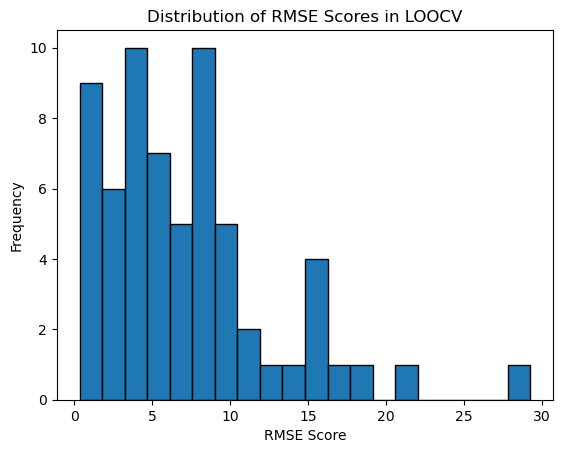

In [16]:
import matplotlib.pyplot as plt

# Distribution of RMSE Scores
# loocv_rmse_scores contains the RMSE for each instance
plt.hist(loocv_rmse_scores, bins=20, edgecolor='black')
plt.title('Distribution of RMSE Scores in LOOCV')
plt.xlabel('RMSE Score')
plt.ylabel('Frequency')
plt.show()

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the LOOCV method
loocv = LeaveOneOut()

# Initialize rf_regressor model again
model = RandomForestRegressor(random_state=42)

# Lists to store actual and predicted values
actuals, predictions = [], []

# Iterate over each split
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_rank.iloc[train_index], y_rank.iloc[test_index]

    # Fit the model and make predictions
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Store actual and predicted values
    actuals.append(y_test.iloc[0])
    predictions.append(pred[0])


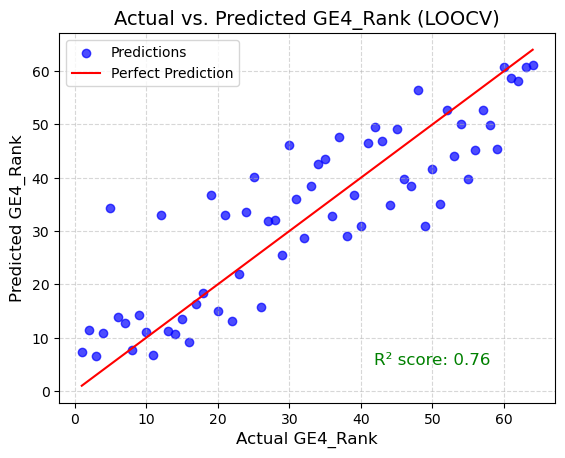

In [18]:
from sklearn.metrics import r2_score

# Plotting Actual vs Predicted values
plt.scatter(actuals, predictions, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r', label='Perfect Prediction') # Diagonal line

# Annotate with R² score
r2 = r2_score(actuals, predictions)
plt.text(50, 5, f'R² score: {r2:.2f}', fontsize=12, color='green', ha='center')

# Add titles and labels
plt.title('Actual vs. Predicted GE4_Rank (LOOCV)', fontsize=14)
plt.xlabel('Actual GE4_Rank', fontsize=12)
plt.ylabel('Predicted GE4_Rank', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend()

# Show the plot
plt.show()

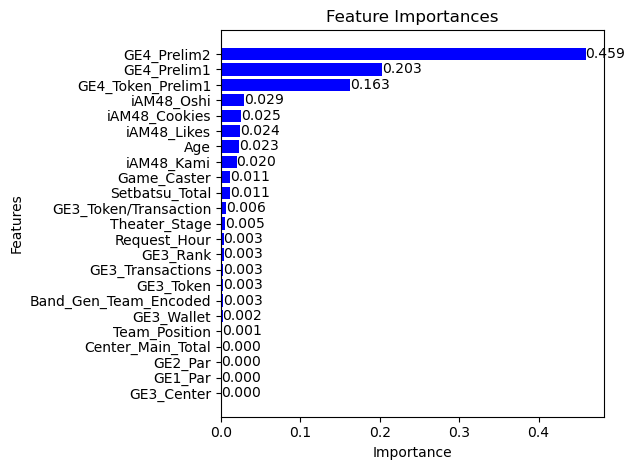

In [26]:
# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)
feature_names = X.columns

# Plot the feature importances vertically
plt.title('Feature Importances')
bars = plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate the bars with the feature importance numbers
for bar in bars:
    plt.text(
        bar.get_width(),       # x-coordinate position for text
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position for text
        f'{bar.get_width():.3f}',  # text (rounded to 3 decimal places)
        va='center',  # vertical alignment
        ha='left'     # horizontal alignment
    )

plt.tight_layout()
plt.show()

Next, I will create the model but not include the any information about GE4 which are `GE4_Prelim1`, `GE4_Token_Prelim1`, `GE4_Prelim2`	

<a id='6-2'></a>

### 6.2 `Position` Classification Model

<a id='6-2-1'></a>

#### 6.2.1 Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

<a id='6-2-2'></a>

#### 6.2.2 XGBoost


<a id='6-2-3'></a>

#### 6.2.3 LightGBM

<a id='6-2-4'></a>

#### 6.2.4 Ensemble

<a id='6-3'></a>

### 6.3 Hyperparameter Tuning (Optuna)

<a id='7'></a>

## 7. Feature Importance Analysis

<a id='8'></a>

## 8. Conclusion and Insights